# **Pre_processing the audio data **
* **format_conversion ----> .wav**
* **resampling ----> 44100Hz**
* **loudness matching**
* **clipping to 30 sec**
* **mixing**

In [1]:
from pydub import AudioSegment
from pydub.playback import play
import os

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio


The conversion from dBFS (Decibels Full Scale) to dB (Decibels) depends on the reference level of your dBFS scale. In the context of audio, dBFS is often measured relative to the maximum possible digital level (0 dBFS). If you know the reference level in dBFS, you can convert it to dB using the following formula:

dB=dBFS+Reference Level


For example, if your reference level is set at -20 dBFS, and you have a signal at -28.75 dBFS:


dB=−28.75dBFS+(−20dBFS)=−48.75dB



In [2]:

def get_loudness(file_path):
    audio = AudioSegment.from_file(file_path)
    loudness = audio.dBFS
    return loudness

def loudness_cal(folder):
    avg_loud = 0
    files = os.listdir(folder)
    num_of_files = len(files)
    for files in os.listdir(folder):
        loud = get_loudness(os.path.join(folder , files))
        avg_loud = avg_loud + loud 
        
    return avg_loud/num_of_files

folder1 = "/kaggle/input/newari-music-data-original/newari_music_dataset/Bansuri"
folder2 = "/kaggle/input/newari-music-data-original/newari_music_dataset/Dhimey"
folder3 = "/kaggle/input/newari-music-data-original/newari_music_dataset/Pachhima"

loudness_B = loudness_cal(folder1)
loudness_P = loudness_cal(folder3)
loudness_D = loudness_cal(folder2)



print(f"Avergae Loudness of Bansuri: {loudness_B:.2f} dBFS")
print(f"Avergae Loudness of Pacchima: {loudness_P:.2f} dBFS")
print(f"Avergae Loudness of Dhimey: {loudness_D:.2f} dBFS")


Avergae Loudness of Bansuri: -26.04 dBFS
Avergae Loudness of Pacchima: -26.82 dBFS
Avergae Loudness of Dhimey: -14.55 dBFS


Explanation:

The values are negative, indicating that the average loudness of these instruments is below the maximum digital level (0 dBFS).
Dhimey has a higher average loudness compared to Bansuri and Pacchima.
Impact on Music Source Separation:

Equalization: The difference in loudness levels might influence how these sources are separated, especially if the model relies on loudness as a feature for source identification.
Dynamic Range: The dynamic range (difference between soft and loud parts) of Dhimey is relatively higher, which might impact the model's ability to separate it from other sources.
Pre-processing: It could be beneficial to normalize or preprocess the audio signals to a consistent loudness level before feeding them into the model to ensure fairness in source separation.
Considerations:

Dynamic Range: Instruments with a wider dynamic range might require careful handling during source separation to avoid artifacts or challenges in separating soft and loud parts.
Training Data: Ensure that the training data for your source separation model covers a diverse range of loudness levels to make the model robust to variations.
In summary, the loudness values provide insights into the energy distribution of the instruments. While these values can influence source separation, other factors such as spectral characteristics, temporal patterns, and the complexity of the mix also play crucial roles. It's advisable to experiment with different preprocessing strategies and consider the overall mix context when training or using source separation models.



on spectrograms, the necessity of loudness normalization becomes less critical compared to when working directly with audio waveforms. Spectrograms represent the frequency content of the audio signal over time, and their characteristics are generally more robust to variations in loudness.

Here are some considerations for spectrogram-based source separation:

Scale Invariance:

Spectrograms are often more scale-invariant compared to raw audio waveforms. The relative loudness of different instruments might be less of an issue when working in the frequency domain.
Training Data Consistency:

Ensure that your training data has consistent characteristics in terms of loudness. If your model is trained on data with varying loudness levels, it might naturally learn to handle such variations.
Experimentation:

It's always a good idea to experiment with and without normalization. Train your model on both normalized and unnormalized datasets and evaluate the impact on the performance of your source separation model.
Dynamic Range Compression:

Instead of normalization, you might consider applying dynamic range compression to the audio signals before converting them into spectrograms. This can help control the dynamic range while preserving the spectral information.

In [3]:
## for normalization in range of -20db - wwhich is mostly used in standard data 

def normalize_audio(audio_path, target_loudness=-20.0):
    audio = AudioSegment.from_file(audio_path)
    normalized_audio = audio.normalize(target_loudness)
    normalized_audio.export("normalized_output.wav", format="wav")

audio_path = "/kaggle/input/newari-music-data-original/newari_music_dataset/Bansuri/Aila luwaya(madal) bansuri.m4a"

normalize_audio(audio_path)

loud_af = get_loudness("/kaggle/working/normalized_output.wav")
loud_bf = get_loudness(audio_path)

print(f"After normalization: {loud_af}")
print(f"Before normalization: {loud_bf}")

After normalization: -3.0420248727392223
Before normalization: -27.818914202508715


# **Visualizing the audio data**

/tmp/ipykernel_33/1557757348.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y_b, sr = librosa.load(audio_path)
/opt/conda/lib/python3.10/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_33/1557757348.py:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y_b), ref=np.max)


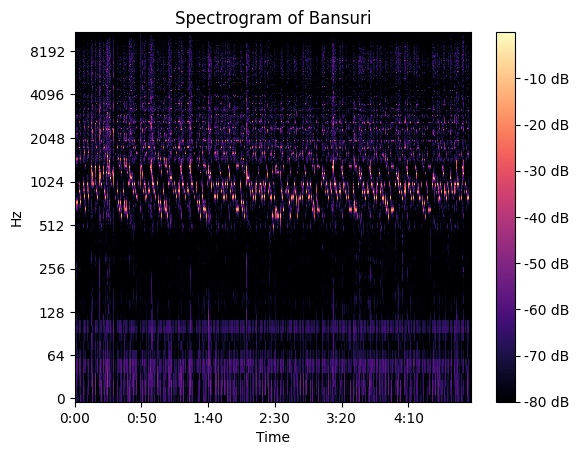

In [4]:

audio_path = "/kaggle/input/newari-music-data-original/newari_music_dataset/Bansuri/Aila luwaya(madal) bansuri.m4a"

y_b, sr = librosa.load(audio_path)
D = librosa.amplitude_to_db(librosa.stft(y_b), ref=np.max)

librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Bansuri')
plt.show()


/tmp/ipykernel_33/1420738271.py:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


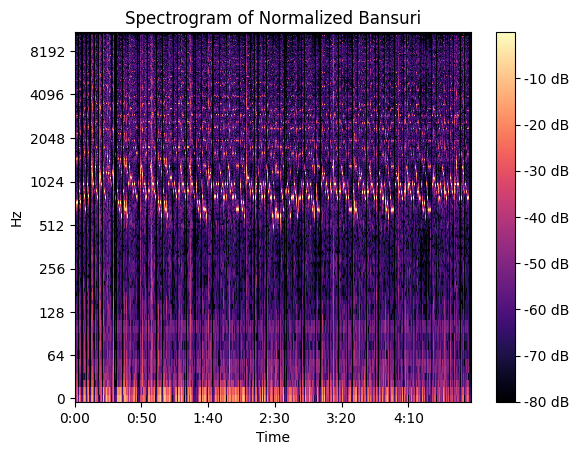

In [5]:
audio_path = "/kaggle/working/normalized_output.wav"

y, sr = librosa.load(audio_path)
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Normalized Bansuri')
plt.show()

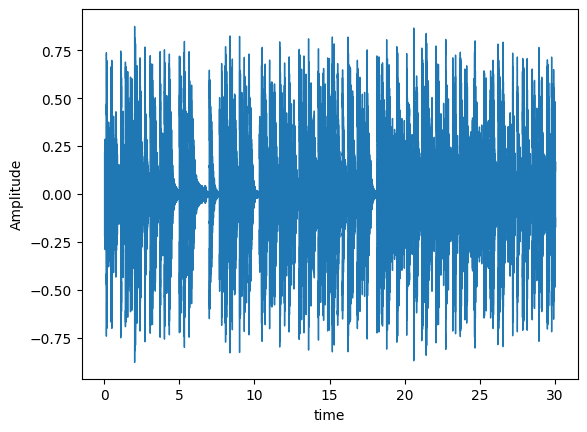

In [6]:
file = "/kaggle/input/newari-music-data-original/newari_music_dataset/Dhimey/MA_boli_12.mp3"

signal, sr = librosa.load(file, sr=None)
librosa.display.waveshow(signal, sr=sr)

plt.xlabel("time")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
fft = np.fft.fft(signal)

magnitude = np.abs(fft)

frequency = np.linspace(0,sr, len(magnitude))

plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title('Spectrum Plot of Dhimey')
plt.show


In [ ]:
fft = np.fft.fft(signal)

magnitude = np.abs(fft)

frequency = np.linspace(0,sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Spectrum Plot of Dhimey")
plt.show()

In [ ]:
FRAME_SIZE = 2048
HOP_SIZE = 512

S_siganl = librosa.stft(signal, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)  ## complex value
Signal_mag = np.abs(S_siganl) ** 2   ## only absolute value

def plot_spectrogram(Y, sr,title, hop_length, y_axis="linear"):
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis="time",
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")
    plt.title(title)

In [ ]:
title = "Magnitude Spectrogram of Dhimey"
plot_spectrogram(Signal_mag, sr,title, HOP_SIZE)

In [ ]:
title = "Log-Amplitude Spectrogram of Dhimey"
Y_log_scale = librosa.power_to_db(Signal_mag)
plot_spectrogram(Y_log_scale, sr,title, HOP_SIZE)

In [ ]:
title = "Log-Frequency Spectrogram of Dhimey"
plot_spectrogram(Y_log_scale, sr,title, HOP_SIZE, y_axis="log")

In [ ]:
title = "Mel Spectrogram of Dhimey"
S = librosa.feature.melspectrogram(y=signal, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
plot_spectrogram(S_dB, sr,title, HOP_SIZE, y_axis="mel")

In [ ]:
audio_path = "/kaggle/input/newari-music-data-original/newari_music_dataset/Pachhima/Cho_taal(chalti).m4a"

y, sr = librosa.load(audio_path)

S_siganl = librosa.stft(y, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
Signal_mag = np.abs(S_siganl) ** 2

title = "Magnitude Spectrogram of Pachhima"
plot_spectrogram(Signal_mag, sr,title, HOP_SIZE)

title = "Log-Amplitude Spectrogram of Pachhima"
Y_log_scale = librosa.power_to_db(Signal_mag)
plot_spectrogram(Y_log_scale, sr,title, HOP_SIZE)

title = "Log-Frequency Spectrogram of Pachhima"
plot_spectrogram(Y_log_scale, sr,title, HOP_SIZE, y_axis="log")

In [ ]:
title = "Mel Spectrogram of Pacchima"
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
plot_spectrogram(S_dB, sr,title, HOP_SIZE, y_axis="mel")

title = "Mel Spectrogram of Bansuri"
S = librosa.feature.melspectrogram(y=y_b, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
plot_spectrogram(S_dB, sr,title, HOP_SIZE, y_axis="mel")

# **Standard Deviation  of Loudness**

A higher standard deviation indicates a larger spread or variability in loudness values.

Bansuri: Has the highest standard deviation (3.93), indicating a wider range of loudness levels. This suggests that Bansuri recordings may have more variability in dynamic range, capturing softer and louder passages.
Pacchima: Has a moderate standard deviation (2.64), indicating a moderate variability in loudness levels.
Dhimey: Has the lowest standard deviation (2.26), suggesting a more consistent loudness level across recordings.
In summary, while Dhimey tends to have a higher average loudness, Bansuri exhibits a wider range of loudness levels with a higher standard deviation. Pacchima falls in between with moderate variability. These insights into average loudness and variability can be valuable for understanding the characteristics of each instrument category in your dataset, and they may influence preprocessing decisions or model training strategies for music source separation.

In [ ]:

def loudness_cal(folder):
    loud = []
    files = os.listdir(folder)
    num_of_files = len(files)
    for files in os.listdir(folder):
        loudness = get_loudness(os.path.join(folder , files))
        loud.append(loudness) 
#         print(loud)
        
    return np.std(loud)

folder1 = "/kaggle/input/newari-music-data-original/newari_music_dataset/Bansuri"
folder2 = "/kaggle/input/newari-music-data-original/newari_music_dataset/Dhimey"
folder3 = "/kaggle/input/newari-music-data-original/newari_music_dataset/Pachhima"

loudness_B = loudness_cal(folder1)
loudness_P = loudness_cal(folder3)
loudness_D = loudness_cal(folder2)



print(f"SD of Loudness of Bansuri: {loudness_B:.2f}")
print(f"SD of Loudness of Pacchima: {loudness_P:.2f}")
print(f"SD of Loudness of Dhimey: {loudness_D:.2f}")


### Standard Deviation of Loudness: Beyond mean loudness, the variability or spread of loudness values can be relevant.

# **RMS**

The Root Mean Square (RMS) energy is a measure that provides insights into the overall energy distribution of an audio signal. Let's break down the concept:

Energy in Audio Signals:

In the context of audio signals, energy refers to the amplitude or strength of the signal. A signal with higher amplitude has more energy, while a signal with lower amplitude has less energy.
RMS Calculation:

The RMS energy is calculated by taking the square root of the mean of the squared values of the signal samples within a specified time frame or window.


Insights into Energy Distribution:

The RMS energy provides a single value that represents the average energy level within a frame. It is often computed over short time windows (frames) to capture variations in energy over time.
Higher RMS values indicate higher energy, while lower RMS values indicate lower energy. The values are usually expressed in the same units as the amplitude of the signal.

In [ ]:

audio_path = "/kaggle/input/newari-music-data-original/newari_music_dataset/Dhimey/MA_boli_10.mp3"
y, sr = librosa.load(audio_path)

rms_energy = librosa.feature.rms(y=y)[0]

time = librosa.frames_to_time(range(len(rms_energy)), sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(time, rms_energy, color='r')
plt.title('Waveform with RMS Energy')
plt.show()


In [ ]:

spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

frames = range(len(spectral_centroid))
t = librosa.frames_to_time(frames, sr=sr)

# Plot the Spectral Centroid over time
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(t, spectral_centroid, color='r')
plt.title('Waveform with Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Centroid')
plt.show()


# **Resampling and converting to wav file**

In [3]:
import warnings
warnings.filterwarnings("ignore")
import soundfile as sf

In [4]:
!mkdir /kaggle/working/Bansuri
!mkdir /kaggle/working/Dhimey
!mkdir /kaggle/working/Pachhima

In [ ]:
!rm -r /kaggle/working/Bansuri
!rm -r /kaggle/working/Dhimey
!rm -r /kaggle/working/Pachhima
!rm /kaggle/working/resampled_audio.wav

In [5]:
def check_sr(folder):
    for files in os.listdir(folder):
        file = os.path.join(folder, files)
        audio, sr = librosa.load(file, sr=None)
        print(files,":", sr)
        if sr != 44100:
            print(f"ERROR! {files} have different sampling rate")

In [6]:
def resampling(folder, name):
    for files in os.listdir(folder):
        file = os.path.join(folder , files)
        audio, sr = librosa.load(file, sr=None)
        
        target_sr = 44100
        y_resampled = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
        
        file = os.path.splitext(os.path.basename(files))[0]
        f = file + ".wav"

        output_audio_path = os.path.join('/kaggle/working/', name, f)
        sf.write(output_audio_path, y_resampled, target_sr)

folder1 = "/kaggle/input/newari-music-data-original/newari_music_dataset/Bansuri"
resampling(folder1, 'Bansuri')

folder2 = "/kaggle/input/newari-music-data-original/newari_music_dataset/Pachhima"
resampling(folder2, 'Pachhima')

folder3 = "/kaggle/input/newari-music-data-original/newari_music_dataset/Dhimey"
resampling(folder3, 'Dhimey')


In [7]:
folder1 = "/kaggle/working/Bansuri"
check_sr(folder1)

# folder2 = "/kaggle/working/Pachhima"
# check_sr(folder2)

# folder3 = "/kaggle/working/Dhimey"
# check_sr(folder3)

RecordingA.wav : 44100
RecordingC.wav : 44100
Rajmati kumati Bansuri.wav : 44100
Sa Re ga ma Pa Bansuri.wav : 44100
Sayau Thunga.wav : 44100
Jhanjakh maya(cho) bansuri.wav : 44100
Salugu gacha_ending.wav : 44100
Aila luwaya(madal) bansuri.wav : 44100
ghantaghar ya kwen(cho taal) Bansuri.wav : 44100
Lakhyae Dhun.wav : 44100
Salugu gacha.wav : 44100
Mangal Dhun(Dadra) Bansuri.wav : 44100
Fulko aankha ma(Cho).wav : 44100
RecordingB.wav : 44100
Sirsaya Heku.wav : 44100
Malshree dhun Bansuri.wav : 44100
basuri_yt.wav : 44100
RecordingD.wav : 44100
Woh chhu gali Bansuri.wav : 44100


# **Segmenting Audio Data into 30 sec**

In [ ]:
!rm -r /kaggle/working/Bansri_clipped
!rm /kaggle/working/segment_09.wav

In [9]:
!mkdir /kaggle/working/Bansuri_clipped
!mkdir /kaggle/working/Dhimey_clipped
!mkdir /kaggle/working/Pachhima_clipped

In [10]:
## for Bansuri
c = 0
def split_and_repeat_audio(input_audio_path, output_folder, segment_duration=30):
    global c
    audio_segments = []
    y, sr = librosa.load(input_audio_path, sr=None)
#     print(sr)
#     print(len(y))
    duration = librosa.get_duration(y=y,sr=sr)
#     print(duration)
    if duration < 30:
        current_duration = librosa.get_duration(y=y, sr=sr)
        repetitions = int(np.ceil(segment_duration / current_duration))

        extended_audio = np.tile(y, repetitions)[:int(segment_duration * sr)]
        
        audio_segments.append(extended_audio)
          
    else:
        num_complete_segments = len(y) // (sr * segment_duration)
    #     print(num_complete_segments)

        audio_segments = np.array_split(y[:num_complete_segments * sr * segment_duration], num_complete_segments)

        if len(y) % (sr * segment_duration) > 0:
            last_segment = y[num_complete_segments * sr * segment_duration:]
    #         print(len(last_segment))

            current_duration = librosa.get_duration(y=last_segment, sr=sr)
            repetitions = int(np.ceil(segment_duration / current_duration))

            extended_audio = np.tile(last_segment, repetitions)[:int(segment_duration * sr)]
    #         print(librosa.get_duration(y=extended_audio, sr=sr))

            audio_segments.append(extended_audio)
    #         print(len(audio_segments[9]))

    for i, segment in enumerate(audio_segments):
        output_path = f"{output_folder}/Bansuri_{c + 1:03d}.wav"
        c = c + 1
        sf.write(output_path, segment, sr)


audio_path = "/kaggle/working/Bansuri"
output_folder = "/kaggle/working/Bansuri_clipped"

for files in os.listdir(audio_path):
    file = os.path.join(audio_path , files)
    print(file)
    split_and_repeat_audio(file, output_folder)

/kaggle/working/Bansuri/RecordingA.wav
/kaggle/working/Bansuri/RecordingC.wav
/kaggle/working/Bansuri/Rajmati kumati Bansuri.wav
/kaggle/working/Bansuri/Sa Re ga ma Pa Bansuri.wav
/kaggle/working/Bansuri/Sayau Thunga.wav
/kaggle/working/Bansuri/Jhanjakh maya(cho) bansuri.wav
/kaggle/working/Bansuri/Salugu gacha_ending.wav
/kaggle/working/Bansuri/Aila luwaya(madal) bansuri.wav
/kaggle/working/Bansuri/ghantaghar ya kwen(cho taal) Bansuri.wav
/kaggle/working/Bansuri/Lakhyae Dhun.wav
/kaggle/working/Bansuri/Salugu gacha.wav
/kaggle/working/Bansuri/Mangal Dhun(Dadra) Bansuri.wav
/kaggle/working/Bansuri/Fulko aankha ma(Cho).wav
/kaggle/working/Bansuri/RecordingB.wav
/kaggle/working/Bansuri/Sirsaya Heku.wav
/kaggle/working/Bansuri/Malshree dhun Bansuri.wav
/kaggle/working/Bansuri/basuri_yt.wav
/kaggle/working/Bansuri/RecordingD.wav
/kaggle/working/Bansuri/Woh chhu gali Bansuri.wav


In [12]:
## for Dhimey
c = 0
def split_and_repeat_audio(input_audio_path, output_folder, segment_duration=30):
    global c
    audio_segments = []
    y, sr = librosa.load(input_audio_path, sr=None)
#     print(sr)
#     print(len(y))
    duration = librosa.get_duration(y=y,sr=sr)
#     print(duration)
    if duration < 30:
        current_duration = librosa.get_duration(y=y, sr=sr)
        repetitions = int(np.ceil(segment_duration / current_duration))

        extended_audio = np.tile(y, repetitions)[:int(segment_duration * sr)]
        
        audio_segments.append(extended_audio)
          
    else:
        num_complete_segments = len(y) // (sr * segment_duration)
    #     print(num_complete_segments)

        audio_segments = np.array_split(y[:num_complete_segments * sr * segment_duration], num_complete_segments)

        if len(y) % (sr * segment_duration) > 0:
            last_segment = y[num_complete_segments * sr * segment_duration:]
    #         print(len(last_segment))

            current_duration = librosa.get_duration(y=last_segment, sr=sr)
            repetitions = int(np.ceil(segment_duration / current_duration))

            extended_audio = np.tile(last_segment, repetitions)[:int(segment_duration * sr)]
    #         print(librosa.get_duration(y=extended_audio, sr=sr))

            audio_segments.append(extended_audio)
    #         print(len(audio_segments[9]))

    for i, segment in enumerate(audio_segments):
        output_path = f"{output_folder}/Dhimey_{c + 1:02d}.wav"
        c = c + 1
        sf.write(output_path, segment, sr)


audio_path = "/kaggle/working/Dhimey"
output_folder = "/kaggle/working/Dhimey_clipped"

for files in os.listdir(audio_path):
    file = os.path.join(audio_path , files)
#     print(file)
    split_and_repeat_audio(file, output_folder)

In [13]:
## for Pachhima
c = 0
def split_and_repeat_audio(input_audio_path, output_folder, segment_duration=30):
    global c
    audio_segments = []
    y, sr = librosa.load(input_audio_path, sr=None)
#     print(sr)
#     print(len(y))
    duration = librosa.get_duration(y=y,sr=sr)
#     print(duration)
    if duration < 30:
        current_duration = librosa.get_duration(y=y, sr=sr)
        repetitions = int(np.ceil(segment_duration / current_duration))

        extended_audio = np.tile(y, repetitions)[:int(segment_duration * sr)]
        
        audio_segments.append(extended_audio)
          
    else:
        num_complete_segments = len(y) // (sr * segment_duration)
    #     print(num_complete_segments)

        audio_segments = np.array_split(y[:num_complete_segments * sr * segment_duration], num_complete_segments)

        if len(y) % (sr * segment_duration) > 0:
            last_segment = y[num_complete_segments * sr * segment_duration:]
    #         print(len(last_segment))

            current_duration = librosa.get_duration(y=last_segment, sr=sr)
            repetitions = int(np.ceil(segment_duration / current_duration))

            extended_audio = np.tile(last_segment, repetitions)[:int(segment_duration * sr)]
    #         print(librosa.get_duration(y=extended_audio, sr=sr))

            audio_segments.append(extended_audio)
    #         print(len(audio_segments[9]))

    for i, segment in enumerate(audio_segments):
        output_path = f"{output_folder}/Pachhima_{c + 1:02d}.wav"
        c = c + 1
        sf.write(output_path, segment, sr)


audio_path = "/kaggle/working/Pachhima"
output_folder = "/kaggle/working/Pachhima_clipped"

for files in os.listdir(audio_path):
    file = os.path.join(audio_path , files)
#     print(file)
    split_and_repeat_audio(file, output_folder)

In [15]:
folder = "/kaggle/working/Pachhima_clipped"
for files in os.listdir(folder):
    print(files)
    file = os.path.join(folder , files)
    audio, sr = librosa.load(file, sr=None)
    duration = librosa.get_duration(y=audio, sr=sr)
    print(duration)


Pachhima_91.wav
5.0
Pachhima_151.wav
5.0
Pachhima_197.wav
5.0
Pachhima_159.wav
5.0
Pachhima_16.wav
5.0
Pachhima_96.wav
5.0
Pachhima_39.wav
5.0
Pachhima_180.wav
5.0
Pachhima_130.wav
5.0
Pachhima_40.wav
5.0
Pachhima_108.wav
5.0
Pachhima_240.wav
5.0
Pachhima_128.wav
5.0
Pachhima_148.wav
5.0
Pachhima_98.wav
5.0
Pachhima_131.wav
5.0
Pachhima_161.wav
5.0
Pachhima_165.wav
5.0
Pachhima_18.wav
5.0
Pachhima_31.wav
5.0
Pachhima_210.wav
5.0
Pachhima_86.wav
5.0
Pachhima_187.wav
5.0
Pachhima_05.wav
5.0
Pachhima_122.wav
5.0
Pachhima_206.wav
5.0
Pachhima_173.wav
5.0
Pachhima_07.wav
5.0
Pachhima_174.wav
5.0
Pachhima_160.wav
5.0
Pachhima_36.wav
5.0
Pachhima_112.wav
5.0
Pachhima_120.wav
5.0
Pachhima_63.wav
5.0
Pachhima_162.wav
5.0
Pachhima_144.wav
5.0
Pachhima_184.wav
5.0
Pachhima_208.wav
5.0
Pachhima_117.wav
5.0
Pachhima_110.wav
5.0
Pachhima_245.wav
5.0
Pachhima_43.wav
5.0
Pachhima_02.wav
5.0
Pachhima_224.wav
5.0
Pachhima_44.wav
5.0
Pachhima_64.wav
5.0
Pachhima_167.wav
5.0
Pachhima_52.wav
5.0
Pachhima_2

# **Mixing the Auido into 1-1 mapping**

In [ ]:
folder1 = "/kaggle/working/Bansuri_clipped"
lenght1 = len(os.listdir(folder1))
print(lenght1)
folder2 = "/kaggle/working/Dhimey_clipped"
lenght2 = len(os.listdir(folder2))
print(lenght2)
folder3 = "/kaggle/working/Pachhima_clipped"
lenght3 = len(os.listdir(folder3))
print(lenght3)

In [ ]:
!cp /kaggle/working/Pachhima_clipped/* /kaggle/working/Dhimey_clipped

In [ ]:
!rm /kaggle/working/Bansri_clipped/Bansuri_72.wav

In [ ]:
### randomly copy the files from directory - so total files in directory is 150 
### renamed copied file starting ffrom 72 in Bansuri 


## for Bansuri - 
import random

start_range = 1
end_range = c = 71
desired_length = 150-71

random_numbers = random.choices(range(start_range, end_range + 1), k=desired_length)
print(len(random_numbers))

print(random_numbers)

def rename_the_file(folder_path, num):
    global c
    target_file_name = f"Bansuri_{num:03d}.wav"
    
    for file_name in os.listdir(folder_path):
        
        if file_name == target_file_name:
            input_audio_path =os.path.join(folder_path , file_name)
            y, sr = librosa.load(input_audio_path, sr=None)
            output_path = f"{folder_path}/Bansuri_{c + 1:03d}.wav"
            c = c+1
#             print(c, num)
            
            sf.write(output_path, y, sr)

            
            return output_path


folder_path = '/kaggle/working/Bansuri_clipped'
# target_file_name = 'Bansuri_36.wav'
random_numbers=sorted(random_numbers)

for i in random_numbers:
    result = rename_the_file(folder_path, i)
    print(result)


###### 

In [ ]:
# folder = "/kaggle/working/Bansri_clipped"
# c = 1
# for files in os.listdir(folder):
#     file = os.path.join(folder, files)
#     new_file = f"{folder}/Bansuri_{c :03d}.wav"
#     os.rename(file, new_file)
#     c = c+1
    

In [ ]:
## for Dhimey

start_range = 1
end_range = c = 78
desired_length = 150-78

random_numbers = random.choices(range(start_range, end_range + 1), k=desired_length)
print(len(random_numbers))

print(random_numbers)

def rename_the_file(folder_path, num):
    global c
    target_file_name = f"Dhimey_{num:03d}.wav"
    
    for file_name in os.listdir(folder_path):
        
        if file_name == target_file_name:
            input_audio_path =os.path.join(folder_path , file_name)
            y, sr = librosa.load(input_audio_path, sr=None)
            output_path = f"{folder_path}/Dhimey_{c + 1:03d}.wav"
            c = c+1
#             print(c, num)
            
            sf.write(output_path, y, sr)

            
            return output_path


folder_path = '/kaggle/working/Dhimey_clipped'
# target_file_name = 'Bansuri_36.wav'
random_numbers=sorted(random_numbers)

for i in random_numbers:
    result = rename_the_file(folder_path, i)
    print(result)

In [ ]:
!mkdir /kaggle/working/mixture

In [ ]:
!rm /kaggle/working/*.wav

In [ ]:
## mixing
for i in range(150):

    bansuri_file = f"/kaggle/working/Bansuri_clipped/Bansuri_{i+1:03d}.wav"
    dhimey_file = f"/kaggle/working/Dhimey_clipped/Dhimey_{i+1:03d}.wav"
    bansuri_data, sr = sf.read(bansuri_file)
    dhimey_data, _ = sf.read(dhimey_file)
    # bansuri_data = bansuri_data.reshape(bansuri_data.shape[0],1)
    # dhimey_data = pachhima_data.reshape(dhimey_data.shape[0],1)

    combined_track = bansuri_data*2 + dhimey_data
    # combined_track = combined_track.reshape(combined_track.shape[0])
    output_path = f"/kaggle/working/mixture/mixture_{i + 1:03d}.wav"
    sf.write(output_path, combined_track, sr)

# Audio(combined_track, rate=sr)


In [ ]:
Audio(bansuri_data, rate=sr)

In [ ]:
Audio(dhimey_data, rate=sr)

In [ ]:
### to make the stem file -MUSDB format

# import stempeg
# import numpy as np

# print(vocals.shape, vocals)
# bansuri_file = '/kaggle/input/musicbansuriandpaachhima/bansuri.wav'
# pachhima_file = '/kaggle/input/musicbansuriandpaachhima/pachhima.wav'

# # Read the audio files
# bansuri_data, sample_rate = sf.read(bansuri_file)
# pachhima_data, _ = sf.read(pachhima_file)
# bansuri_data = bansuri_data.reshape(bansuri_data.shape[0],1)
# pachhima_data = pachhima_data.reshape(pachhima_data.shape[0],1)


# # Set the volume scaling factors for bansuri and pachhima
# bansuri_volume = 1  # Adjust as needed
# pachhima_volume = 0.6  # Adjust as needed

# # Scale the audio data for each track by the volume scaling factor
# bansuri_data_scaled = bansuri_volume * bansuri_data
# pachhima_data_scaled = pachhima_volume * pachhima_data

# # Combine bansuri and pachhima into a single track
# combined_track = bansuri_data_scaled + pachhima_data_scaled

# # Create a dictionary of stem data
# # Create stems
# stems = {
#     'bansuri': bansuri_data,
#     'pachhima': pachhima_data,
#     'combined_track': combined_track  # Add the combined track
# }
# output_stem_file = 'newari_instruments.stem.mp4'
# # Convert the stem data to a stem file
# stempeg.write_stems(output_stem_file, stems, sample_rate=44100)

In [ ]:
file1= "/kaggle/working/Dhimey_clipped/Dhimey_002.wav"
file2 ="/kaggle/working/Bansuri_clipped/Bansuri_112.wav"
file3 = "/kaggle/working/mixture/mixture_002.wav"

audio1, sr = librosa.load(file1, sr=None)
Audio(audio1, rate=sr)



In [ ]:
audio2, sr = librosa.load(file2, sr=None)
Audio(audio2, rate=sr)



In [ ]:
audio3, sr = librosa.load(file3, sr=None)
Audio(audio3, rate=sr)

In [16]:
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode !=0:
        print("Unable to run zip command")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [19]:
download_file('/kaggle/working/Pachhima_clipped', 'pachhima5')

/kaggle/working/pachhima5.zip

In [17]:
download_file('/kaggle/working/Dhimey_clipped', 'dhimey5')

/kaggle/working/dhimey5.zip

In [18]:
download_file('/kaggle/working/Bansuri_clipped', 'banusri5')

/kaggle/working/banusri5.zip